# 0. 환경 설정

In [2]:
!pip install tslearn
!pip install hdbscan

     |████████████████████████████████| 793 kB 4.9 MB/s 
     |████████████████████████████████| 5.2 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330799 sha256=0c0bdf72720cb7f8048d48bd2580edefa14c1845ea2e6e276bc3aefa4828a779
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import tslearn
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
import hdbscan
import random
import collections
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. 데이터 불러오기 & 스케일링

In [7]:
time10= pd.read_csv("/content/gdrive/MyDrive/DSL/[22-1] Modeling/suy_10_2.csv")
time10.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
time10.head(3)

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  a10
0         21  0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0
1         28  5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0
2         31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
#중간에 비어있는 행 지우기
time10.dropna(inplace=True)

In [9]:
time10

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  a10
0             21  0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0
1             28  5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0
2             31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3             61  2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  2.0
4             92  5.0  1.0  2.0  5.0  1.0  2.0  5.0  1.0  2.0  5.0
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
86418   72356105  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86419   72356116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86420   72356142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86421   72356153  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0
86422   72356160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0

[84323 rows x 11 columns]

In [10]:
X=time10.iloc[:,1:11]
X

a1   a2   a3   a4   a5   a6   a7   a8   a9  a10
0      0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0
1      5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  2.0
4      5.0  1.0  2.0  5.0  1.0  2.0  5.0  1.0  2.0  5.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
86418  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86420  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
86421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0
86422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0

[84323 rows x 10 columns]

In [13]:
from tslearn.preprocessing.preprocessing import TimeSeriesScalerMeanVariance
#스케일링
Xt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X)
#확인
Xt[0]

array([[-0.89473684],
       [-0.36842105],
       [ 0.15789474],
       [-0.89473684],
       [-0.89473684],
       [ 0.68421053],
       [ 1.73684211],
       [ 1.73684211],
       [-0.89473684],
       [-0.36842105]])

#Kmeans

## Cluster 2개

In [15]:
model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 13분

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=2, random_state=32)

In [16]:
pred_kmeans2=model.predict(Xt)

In [17]:
time10['km2cluster'] = model.labels_

In [18]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_2.csv')

In [21]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=2
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans2)[i])

Text(0.5, 1.2, 'Cluster Distribution')

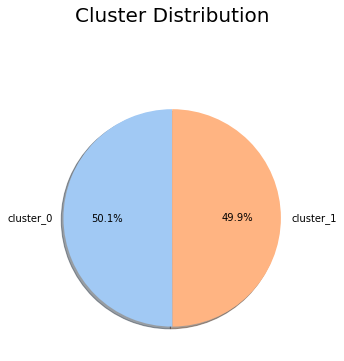

In [22]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:2]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [42]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans2==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

No handles with labels found to put in legend.


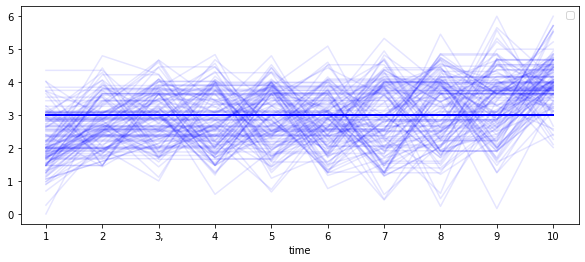

In [43]:
#cluster 0
show_cluster_dist(0)

No handles with labels found to put in legend.


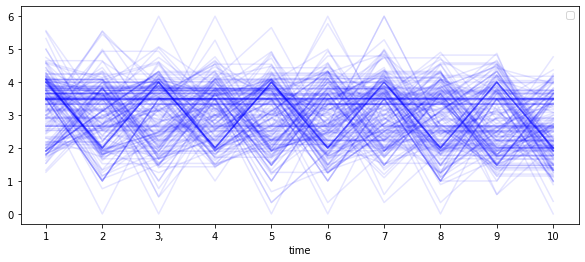

In [44]:
#cluster 1
show_cluster_dist(1)

In [48]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(X, time10['km2cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0554


In [54]:
XX=Xt.reshape(-1,10)

In [55]:
XX.shape

(84323, 10)

In [56]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km2cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.1003


## Cluster 3개

In [57]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(Xt)
#걸린시간 : 20분

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [58]:
pred_kmeans3=model.predict(Xt)

In [59]:
time10['km3cluster'] = model.labels_

In [60]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_3.csv')

In [61]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=3
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans3)[i])

Text(0.5, 1.2, 'Cluster Distribution')

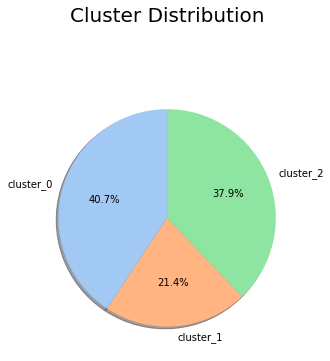

In [62]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [63]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans3==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


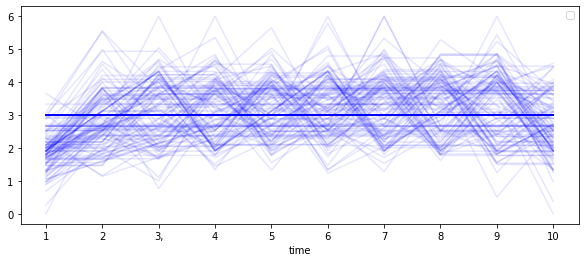

No handles with labels found to put in legend.


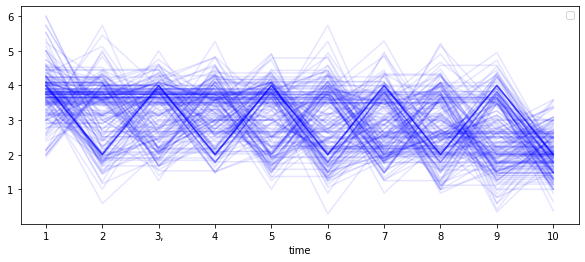

No handles with labels found to put in legend.


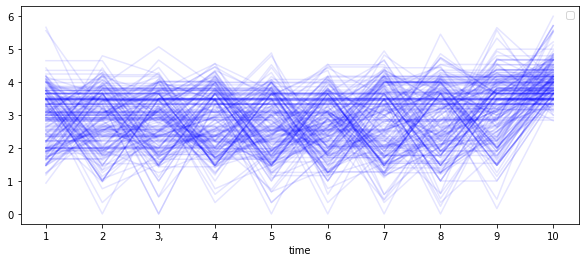

In [64]:
#cluster 0
show_cluster_dist(0)
#cluster 1
show_cluster_dist(1)
#cluster 2
show_cluster_dist(2)

In [66]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(X, time10['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0419


In [67]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0797


## Cluster 4개

In [69]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 25분

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4, random_state=32)

In [70]:
pred_kmeans4=model.predict(Xt)

In [71]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_4.csv')

In [72]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=4
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans4)[i])

Text(0.5, 1.2, 'Cluster Distribution')

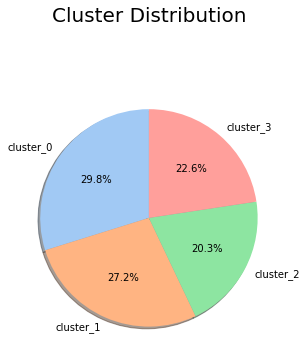

In [73]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:4]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [75]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans4==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


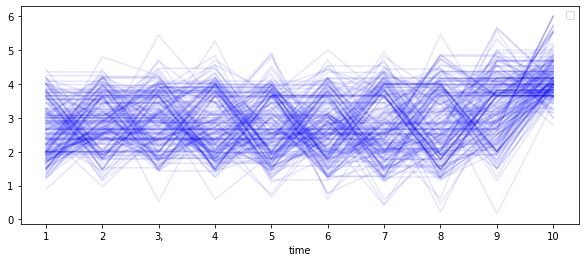

No handles with labels found to put in legend.


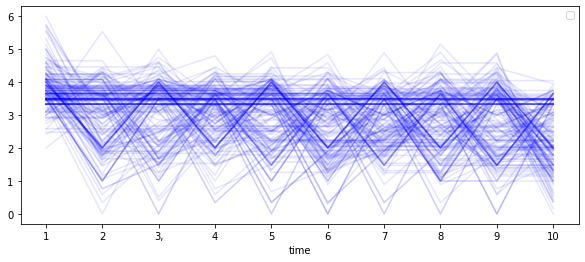

No handles with labels found to put in legend.


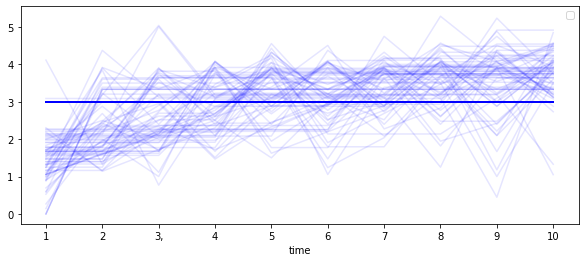

No handles with labels found to put in legend.


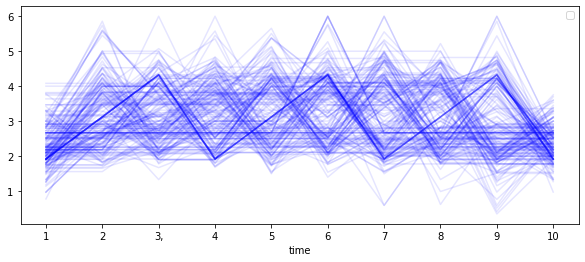

In [76]:
#cluster 시각화
show_cluster_dist(0)
show_cluster_dist(1)
show_cluster_dist(2)
show_cluster_dist(3)

In [77]:
time10['km4cluster'] = model.labels_

In [78]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
#실루엣함수값
average_coef = silhouette_score(X, time10['km4cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0243


In [79]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km4cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0232


##Cluster 5개

In [80]:
model = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 25분

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=5, random_state=32)

In [81]:
pred_kmeans5=model.predict(Xt)

In [82]:
time10['km5cluster'] = model.labels_

In [83]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_5.csv')

In [84]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=5
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans5)[i])

Text(0.5, 1.2, 'Cluster Distribution')

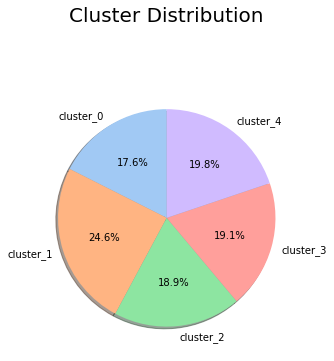

In [85]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [86]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans5==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


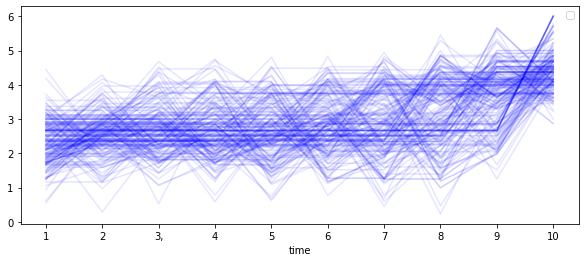

No handles with labels found to put in legend.


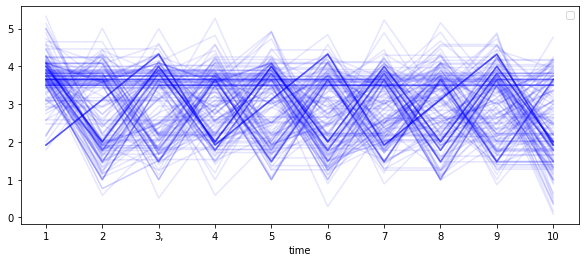

No handles with labels found to put in legend.


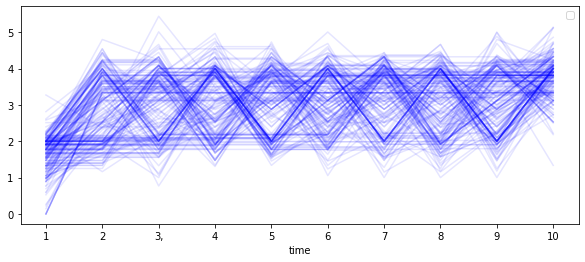

No handles with labels found to put in legend.


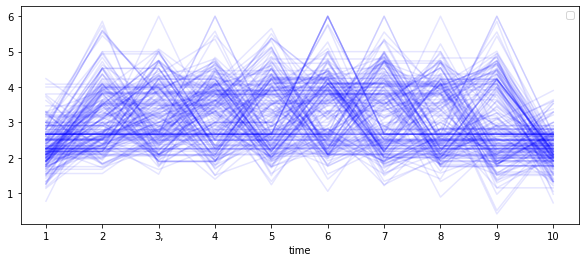

No handles with labels found to put in legend.


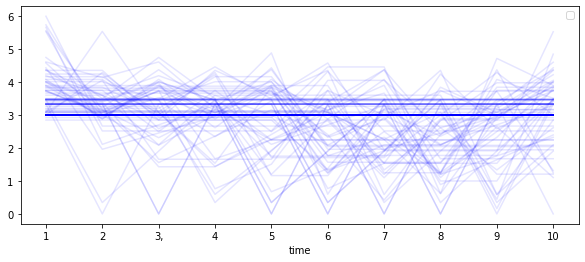

In [87]:
#cluster 시각화
show_cluster_dist(0)
show_cluster_dist(1)
show_cluster_dist(2)
show_cluster_dist(3)
show_cluster_dist(4)

In [88]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
#실루엣함수값
average_coef = silhouette_score(X, time10['km5cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0124


In [89]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km5cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0346


##Cluster 6개

In [90]:
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=6, random_state=32)

In [91]:
pred_kmeans6=model.predict(Xt)

In [92]:
time10['km6cluster'] = model.labels_

In [93]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_6.csv')

In [94]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=6
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans6)[i])

Text(0.5, 1.2, 'Cluster Distribution')

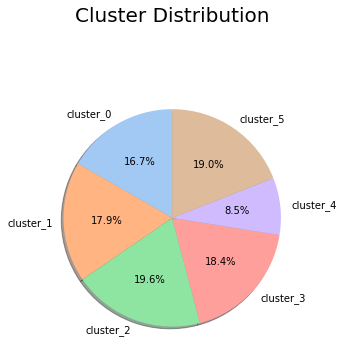

In [95]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:6]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [96]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans6==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


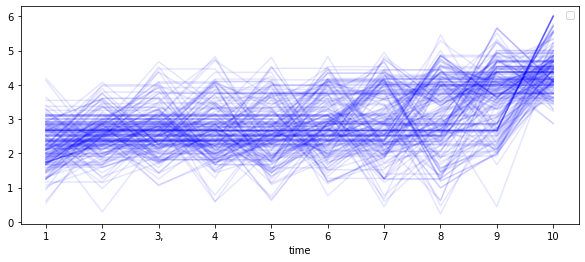

No handles with labels found to put in legend.


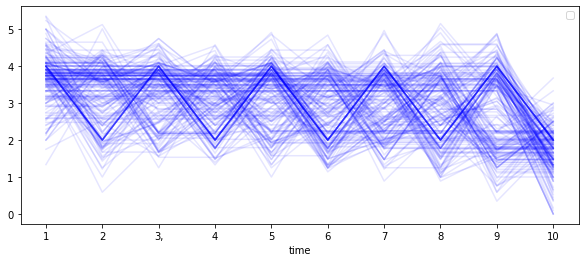

No handles with labels found to put in legend.


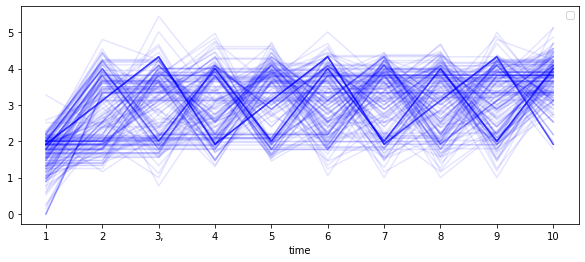

No handles with labels found to put in legend.


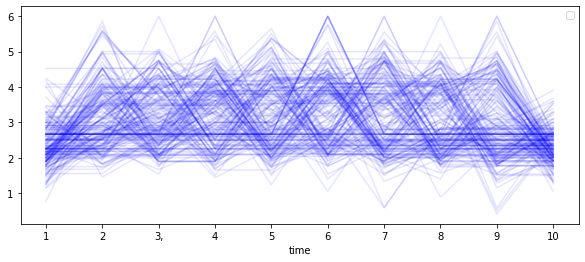

No handles with labels found to put in legend.


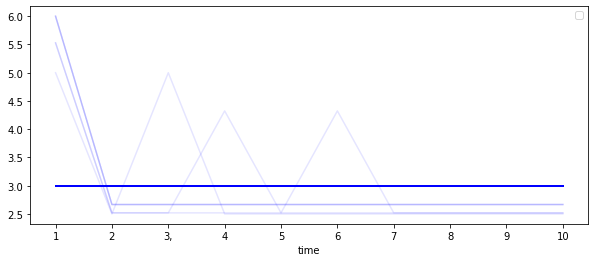

No handles with labels found to put in legend.


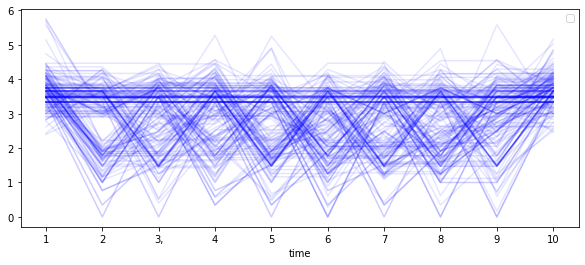

In [97]:
#cluster 시각화
show_cluster_dist(0)
show_cluster_dist(1)
show_cluster_dist(2)
show_cluster_dist(3)
show_cluster_dist(4)
show_cluster_dist(5)

In [98]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
#실루엣함수값
average_coef = silhouette_score(X, time10['km6cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0057


In [99]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km6cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0578


##Cluster 7개

In [100]:
model = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=7, random_state=32)

In [101]:
pred_kmeans7=model.predict(Xt)

In [102]:
time10['km7cluster'] = model.labels_

In [103]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_7.csv')

In [104]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=7
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans7)[i])

Text(0.5, 1.2, 'Cluster Distribution')

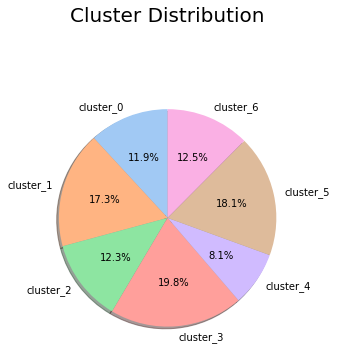

In [105]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:7]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [106]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans7==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


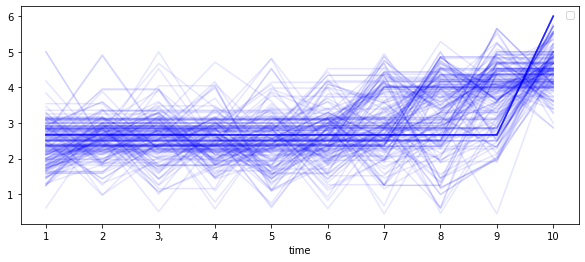

No handles with labels found to put in legend.


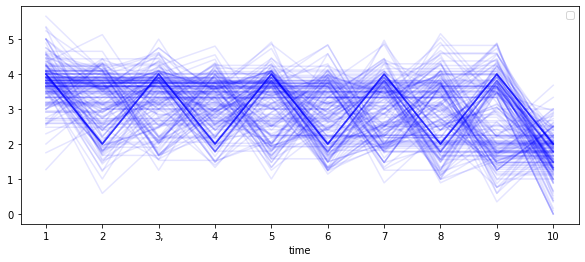

No handles with labels found to put in legend.


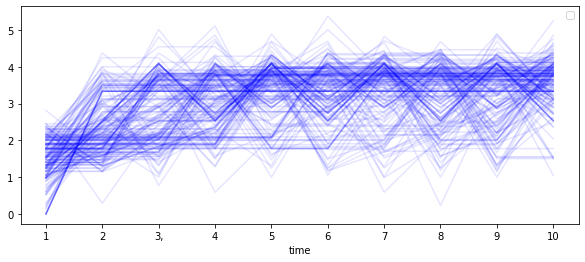

No handles with labels found to put in legend.


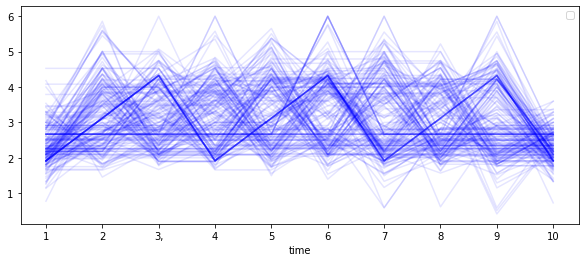

No handles with labels found to put in legend.


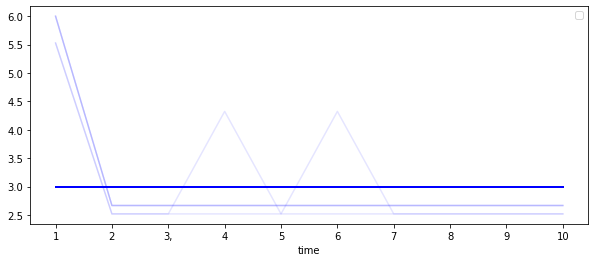

No handles with labels found to put in legend.


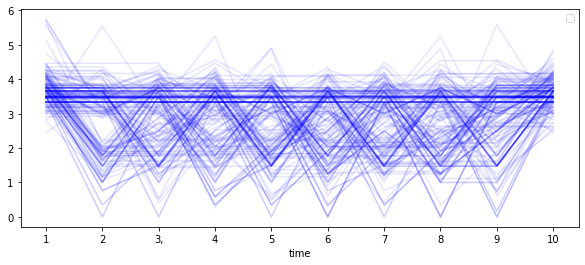

No handles with labels found to put in legend.


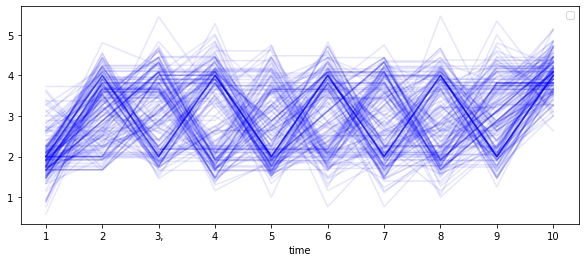

In [107]:
#cluster 시각화
show_cluster_dist(0)
show_cluster_dist(1)
show_cluster_dist(2)
show_cluster_dist(3)
show_cluster_dist(4)
show_cluster_dist(5)
show_cluster_dist(6)

In [108]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
#실루엣함수값
average_coef = silhouette_score(X, time10['km7cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0105


In [109]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km7cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0550


##Cluster 8개

In [110]:
model = TimeSeriesKMeans(n_clusters=8, metric="dtw", max_iter=10, random_state=32)
model.fit(Xt)
#걸린시간: 

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=8, random_state=32)

In [111]:
pred_kmeans8=model.predict(Xt)

In [112]:
time10['km8cluster'] = model.labels_

In [113]:
time10.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans_10_8.csv')

In [114]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
n_cluster=8
for i in range(n_cluster):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(pred_kmeans8)[i])

Text(0.5, 1.2, 'Cluster Distribution')

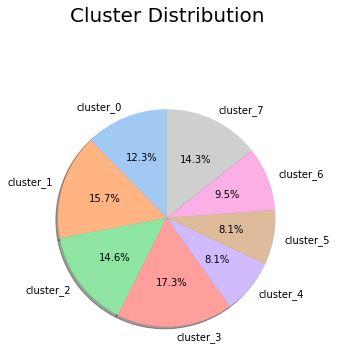

In [115]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')[0:8]
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',colors=colors)
plt.title("Cluster Distribution",position=(0.5,1.2),fontsize=20)

In [116]:
def show_cluster_dist(num_cluster,num_sample=200):
  plt.figure(figsize=(10,4))
  size = sizes[num_cluster]
  if(size>num_sample):
    size = num_sample
  for i in range(size):
    name = "cluster" + str(i) 
    plt.plot(['1','2','3,','4','5','6','7','8','9','10'],np.array(Xt[[pred_kmeans8==num_cluster]][i]+3),alpha=0.1, color='blue')
  plt.xlabel("time")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


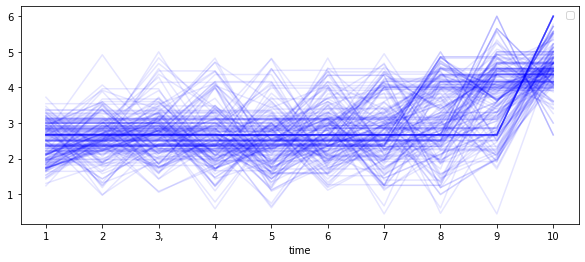

No handles with labels found to put in legend.


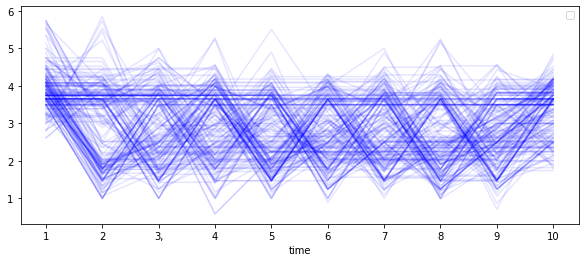

No handles with labels found to put in legend.


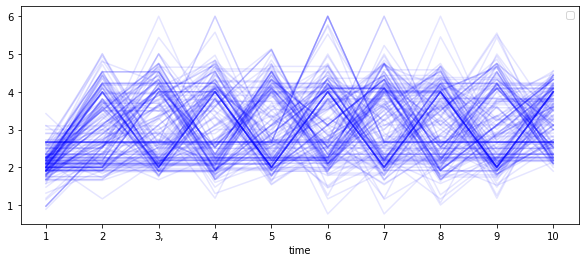

No handles with labels found to put in legend.


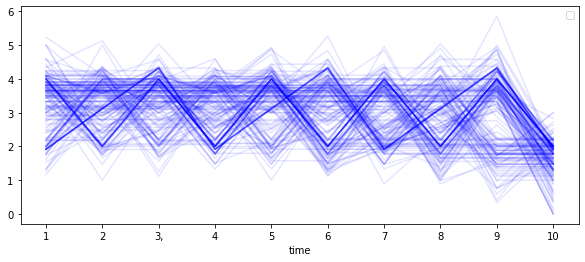

No handles with labels found to put in legend.


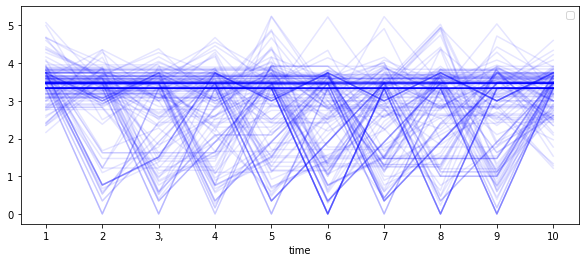

No handles with labels found to put in legend.


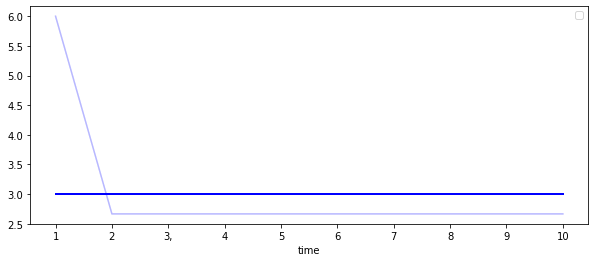

No handles with labels found to put in legend.


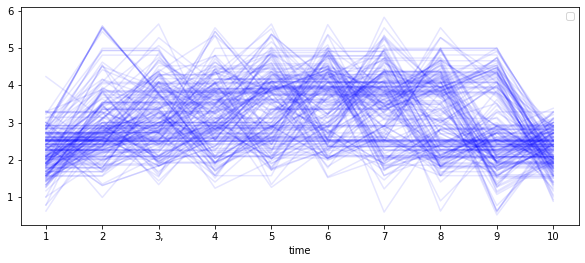

No handles with labels found to put in legend.


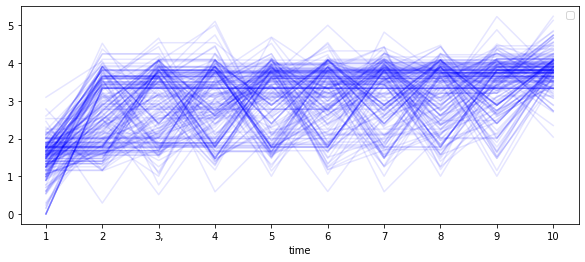

In [117]:
#cluster 시각화
show_cluster_dist(0)
show_cluster_dist(1)
show_cluster_dist(2)
show_cluster_dist(3)
show_cluster_dist(4)
show_cluster_dist(5)
show_cluster_dist(6)
show_cluster_dist(7)

In [118]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
#실루엣함수값
average_coef = silhouette_score(X, time10['km8cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0246


In [119]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(XX, time10['km8cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: -0.0626



#Kmeans(16개) 실루엣계수와 비교

In [121]:
time16= pd.read_csv("/content/gdrive/MyDrive/DSL/[22-1] Modeling/kmeans5.csv")
time16.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
time16.head(3)

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  ...  a11  a12  a13  \
0         21  0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  ...  2.0  0.0  0.0   
1         28  5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  ...  5.0  2.0  0.0   
2         61  2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  3.0  3.0   

   a14  a15  a16  km3cluster  km2cluster  km4cluster  km5cluster  
0  0.0  5.0  5.0           0           0           3           2  
1  2.0  2.0  2.0           1           1           1           4  
2  5.0  0.0  0.0           1           1           0           4  

[3 rows x 21 columns]

In [123]:
Y=time16.iloc[:,1:17]
Y

a1   a2   a3   a4   a5   a6   a7   a8   a9  a10  a11  a12  a13  a14  \
0      0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0  2.0  0.0  0.0  0.0   
1      5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0  5.0  2.0  0.0  2.0   
2      2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  3.0  3.0  5.0   
3      5.0  1.0  2.0  5.0  1.0  2.0  5.0  1.0  2.0  5.0  5.0  1.0  2.0  5.0   
4      5.0  4.0  5.0  4.0  5.0  4.0  5.0  4.0  5.0  4.0  3.0  3.0  5.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
55897  3.0  3.0  3.0  2.0  3.0  0.0  3.0  0.0  3.0  3.0  3.0  3.0  0.0  3.0   
55898  2.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0   
55899  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  5.0  5.0  5.0  4.0  5.0   
55900  5.0  1.0  2.0  5.0  4.0  5.0  1.0  2.0  5.0  4.0  5.0  5.0  5.0  1.0   
55901  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       a15  a16  
0      5.0  5.0  
1      2.0  2.0  
2      0.0  0.0  
3      3.0  3.0  
4      2.0  5.0  
...    ...  ...  
55897  0.0  5.0  
55898  5.0  1.0  
55899  5.0  5.0  
55900  2.0  5.0  
55901  0.0  0.0  

[55902 rows x 16 columns]

In [124]:
#스케일링
Yt=TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(Y)
#확인
Yt[0]

array([[-0.88947012],
       [-0.39872799],
       [ 0.09201415],
       [-0.88947012],
       [-0.88947012],
       [ 0.58275629],
       [ 1.56424056],
       [ 1.56424056],
       [-0.88947012],
       [-0.39872799],
       [ 0.09201415],
       [-0.88947012],
       [-0.88947012],
       [-0.88947012],
       [ 1.56424056],
       [ 1.56424056]])

In [125]:
YY=Yt.reshape(-1,16)
YY.shape

(55902, 16)

**2개 클러스터링**

In [127]:
# 16 series 실루엣 계수
average_coef = silhouette_score(Y, time16['km2cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0586


In [126]:
# 16 series 실루엣 계수
average_coef = silhouette_score(YY, time16['km2cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0814


**3개 클러스터링**

In [128]:
# 16 series 실루엣 계수
average_coef = silhouette_score(Y, time16['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0365


In [129]:
# 16 series 실루엣 계수
average_coef = silhouette_score(YY, time16['km3cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0614


**4개 클러스터링**

In [130]:
# 16 series 실루엣 계수
average_coef = silhouette_score(Y, time16['km4cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0152


In [131]:
# 16 series 실루엣 계수
average_coef = silhouette_score(YY, time16['km4cluster'],metric='euclidean')
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.0407


오히려, series 10개 가지고 한 것이 더 실루엣 계수가 높음.

# 데이터 변형 (11개 있는 데이터 가져오기)

In [133]:
#온라인행동 정보
on_be= pd.read_csv("/content/gdrive/My Drive/DSL/[22-1] Modeling/온라인행동정보.csv")
#   on_be

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [134]:
on_be['date']=on_be['sess_dt'].astype(str)+on_be['hit_tm']

In [135]:
on_be['date']=on_be['date'].str.replace(pat=r'[^A-Za-z0-9]', repl=r'', regex=True)
on_be['date']=on_be['date'].astype(int)
on_be['date']

0          201909130116
1          201909130114
2          201909130117
3          201909130046
4          201909130117
               ...     
3196357    201908150347
3196358    201907210122
3196359    201907210118
3196360    201907312014
3196361    201908181635
Name: date, Length: 3196362, dtype: int64

In [136]:
on_be.drop(labels=['biz_unit','sess_dt','hit_tm','trans_id','sech_kwd','tot_pag_view_ct','tot_sess_hr_v','trfc_src','dvc_ctg_nm'],axis=1,inplace=True)

In [137]:
on_be['clnt_sess']=on_be['clnt_id'].astype(str)+on_be['sess_id'].astype(str)
on_be.drop(labels=['sess_id','clnt_id'],axis=1,inplace=True)

In [138]:
#clnt_sess int타입 변경
on_be['clnt_sess']=on_be['clnt_sess'].astype(int)

In [139]:
on_be=on_be[['clnt_sess','date','hit_seq','action_type','hit_pss_tm']]

In [140]:
gr1=on_be.groupby('clnt_sess').agg({'clnt_sess':'count'})

In [141]:
gr1[gr1['clnt_sess']>=11]

clnt_sess
clnt_sess           
21                43
28                68
61                39
92                31
95                21
...              ...
72356104          14
72356116          11
72356142          12
72356153          11
72356160          14

[79757 rows x 1 columns]

In [144]:
A=gr1[gr1['clnt_sess']>=11].index
A

Int64Index([      21,       28,       61,       92,       95,       96,
                 171,      173,      175,      210,
            ...
            71769123, 71769124, 71769125, 71769126, 72356103, 72356104,
            72356116, 72356142, 72356153, 72356160],
           dtype='int64', name='clnt_sess', length=79757)

In [145]:
on_be=on_be[on_be['clnt_sess'].isin(A)]

In [146]:
gr1=on_be.groupby('clnt_sess')

In [147]:
gr1.first()

date  hit_seq  action_type  hit_pss_tm
clnt_sess                                                
21         201907282343       32            5      564791
28         201907312051       35            3     1199128
61         201907101345       14            5     2525688
92         201907011632       28            3      527994
95         201907081112        3            5       60444
...                 ...      ...          ...         ...
72356104   201908271329       11            6     1181556
72356116   201908301508       10            0      484725
72356142   201909211108        8            0     2575371
72356153   201909242144       11            6     3009158
72356160   201909252114        8            6      929416

[79757 rows x 4 columns]

In [148]:
func= lambda gr1: gr1.sort_values(by='hit_seq')[:11]
gr2=gr1.apply(func)

In [149]:
gr3=gr2.reset_index(level=1,drop=True)

In [150]:
gr3

clnt_sess          date  hit_seq  action_type  hit_pss_tm
clnt_sess                                                           
21                21  201907282335        1            0       39532
21                21  201907282335        2            1       47232
21                21  201907282335        3            2       48087
21                21  201907282335        4            0       62794
21                21  201907282336        5            0      104074
...              ...           ...      ...          ...         ...
72356160    72356160  201909252111        7            0      775814
72356160    72356160  201909252114        8            6      929416
72356160    72356160  201909252120        9            0     1267947
72356160    72356160  201909252120       10            0     1278110
72356160    72356160  201909252121       11            0     1339680

[877327 rows x 5 columns]

In [151]:
gr3.index.name = 'id'
gr3 = gr3.reset_index()

In [152]:
gr3.drop(labels=['id'],axis=1,inplace=True)

In [153]:
gr3=gr3.sort_values(by=['clnt_sess',"date","hit_seq"])

In [154]:
gr3

clnt_sess          date  hit_seq  action_type  hit_pss_tm
0              21  201907282335        1            0       39532
1              21  201907282335        2            1       47232
2              21  201907282335        3            2       48087
3              21  201907282335        4            0       62794
4              21  201907282336        5            0      104074
...           ...           ...      ...          ...         ...
877322   72356160  201909252111        7            0      775814
877323   72356160  201909252114        8            6      929416
877324   72356160  201909252120        9            0     1267947
877325   72356160  201909252120       10            0     1278110
877326   72356160  201909252121       11            0     1339680

[877327 rows x 5 columns]

In [155]:
gr3[gr3['clnt_sess']==160071].sort_values(by=["date","hit_seq"])

clnt_sess          date  hit_seq  action_type  hit_pss_tm
91388     160071  201907010000        1            2       15171
91389     160071  201907010000        2            3       22682
91390     160071  201907010003        3            0      170336
91391     160071  201907010003        4            0      195393
91392     160071  201907010003        5            0      202446
91393     160071  201907010004        6            3      213768
91394     160071  201907010004        7            0      221605
91395     160071  201907010004        8            3      249978
91396     160071  201907010004        9            3      253765
91397     160071  201907010004       10            3      261527
91398     160071  201907010005       11            0      270212

In [156]:
gr3.drop(labels=['date','hit_pss_tm'],axis=1,inplace=True)
piv=pd.pivot_table(gr3, index='clnt_sess', columns='hit_seq', values='action_type')
piv=piv.reset_index()
piv.columns = ['clnt_sess','a1', 'a2', 'a3','a4','a5',
               'a6','a7','a8','a9','a10','a11']

In [157]:
piv[piv['clnt_sess']==160071]

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  a10  a11
8308     160071  2.0  3.0  0.0  0.0  0.0  3.0  0.0  3.0  3.0  3.0  0.0

In [159]:
piv.dropna(inplace=True)

In [161]:
piv.to_csv('/content/gdrive/MyDrive/DSL/[22-1] Modeling/suy_11.csv',encoding='utf-8')

In [160]:
piv

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  a10  a11
0             21  0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0  2.0
1             28  5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0  5.0
2             61  2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0
3             92  5.0  1.0  2.0  5.0  1.0  2.0  5.0  1.0  2.0  5.0  5.0
4             95  5.0  4.0  5.0  4.0  5.0  4.0  5.0  4.0  5.0  4.0  3.0
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
79752   72356104  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0
79753   72356116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
79754   72356142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
79755   72356153  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  6.0
79756   72356160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0

[77812 rows x 12 columns]

In [162]:
time10

clnt_sess   a1   a2   a3   a4   a5   a6   a7   a8   a9  a10  \
0             21  0.0  1.0  2.0  0.0  0.0  3.0  5.0  5.0  0.0  1.0   
1             28  5.0  0.0  1.0  2.0  1.0  2.0  1.0  2.0  3.0  0.0   
2             31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             61  2.0  3.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  2.0   
4             92  5.0  1.0  2.0  5.0  1.0  2.0  5.0  1.0  2.0  5.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
86418   72356105  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
86419   72356116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
86420   72356142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
86421   72356153  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0   
86422   72356160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0   

       km2cluster  km3cluster  km4cluster  km5cluster  km6cluster  km7cluster  \
0               1           0           3           3           3           3   
1               1           1           1           1           1           1   
2               0           0           2           4           4           4   
3               1           2           3           3           3           3   
4               1           2           0           1           5           5   
...           ...         ...         ...         ...         ...         ...   
86418           0           0           2           4           4           4   
86419           0           0           2           4           4           4   
86420           0           0           2           4           4           4   
86421           1           0           3           3           3           3   
86422           1           0           3           3           3           3   

       km8cluster  
0               6  
1               1  
2               5  
3               6  
4               1  
...           ...  
86418           5  
86419           5  
86420           5  
86421           2  
86422           2  

[84323 rows x 18 columns]

#합치기

In [163]:
tt=pd.merge(time10,piv, on=['clnt_sess'])
tt

clnt_sess  a1_x  a2_x  a3_x  a4_x  a5_x  a6_x  a7_x  a8_x  a9_x  ...  \
0             21   0.0   1.0   2.0   0.0   0.0   3.0   5.0   5.0   0.0  ...   
1             28   5.0   0.0   1.0   2.0   1.0   2.0   1.0   2.0   3.0  ...   
2             61   2.0   3.0   5.0   3.0   0.0   0.0   0.0   0.0   0.0  ...   
3             92   5.0   1.0   2.0   5.0   1.0   2.0   5.0   1.0   2.0  ...   
4             95   5.0   4.0   5.0   4.0   5.0   4.0   5.0   4.0   5.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
77807   72356104   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
77808   72356116   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
77809   72356142   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
77810   72356153   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   0.0  ...   
77811   72356160   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   0.0  ...   

       a2_y  a3_y  a4_y  a5_y  a6_y  a7_y  a8_y  a9_y  a10_y  a11  
0       1.0   2.0   0.0   0.0   3.0   5.0   5.0   0.0    1.0  2.0  
1       0.0   1.0   2.0   1.0   2.0   1.0   2.0   3.0    0.0  5.0  
2       3.0   5.0   3.0   0.0   0.0   0.0   0.0   0.0    2.0  0.0  
3       1.0   2.0   5.0   1.0   2.0   5.0   1.0   2.0    5.0  5.0  
4       4.0   5.0   4.0   5.0   4.0   5.0   4.0   5.0    4.0  3.0  
...     ...   ...   ...   ...   ...   ...   ...   ...    ...  ...  
77807   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  6.0  
77808   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  0.0  
77809   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  0.0  
77810   0.0   0.0   0.0   0.0   0.0   0.0   6.0   0.0    0.0  6.0  
77811   0.0   0.0   0.0   0.0   0.0   0.0   6.0   0.0    0.0  0.0  

[77812 rows x 29 columns]

In [164]:
tt.columns

Index(['clnt_sess', 'a1_x', 'a2_x', 'a3_x', 'a4_x', 'a5_x', 'a6_x', 'a7_x',
       'a8_x', 'a9_x', 'a10_x', 'km2cluster', 'km3cluster', 'km4cluster',
       'km5cluster', 'km6cluster', 'km7cluster', 'km8cluster', 'a1_y', 'a2_y',
       'a3_y', 'a4_y', 'a5_y', 'a6_y', 'a7_y', 'a8_y', 'a9_y', 'a10_y', 'a11'],
      dtype='object')

In [165]:
tt.drop(labels=['a1_x', 'a2_x', 'a3_x', 'a4_x', 'a5_x', 'a6_x', 'a7_x',
       'a8_x', 'a9_x', 'a10_x'],axis=1,inplace=True)

In [166]:
tt

clnt_sess  km2cluster  km3cluster  km4cluster  km5cluster  km6cluster  \
0             21           1           0           3           3           3   
1             28           1           1           1           1           1   
2             61           1           2           3           3           3   
3             92           1           2           0           1           5   
4             95           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
77807   72356104           0           0           2           4           4   
77808   72356116           0           0           2           4           4   
77809   72356142           0           0           2           4           4   
77810   72356153           1           0           3           3           3   
77811   72356160           1           0           3           3           3   

       km7cluster  km8cluster  a1_y  a2_y  a3_y  a4_y  a5_y  a6_y  a7_y  a8_y  \
0               3           6   0.0   1.0   2.0   0.0   0.0   3.0   5.0   5.0   
1               1           1   5.0   0.0   1.0   2.0   1.0   2.0   1.0   2.0   
2               3           6   2.0   3.0   5.0   3.0   0.0   0.0   0.0   0.0   
3               5           1   5.0   1.0   2.0   5.0   1.0   2.0   5.0   1.0   
4               1           3   5.0   4.0   5.0   4.0   5.0   4.0   5.0   4.0   
...           ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
77807           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77808           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77809           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77810           3           2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   
77811           3           2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   

       a9_y  a10_y  a11  
0       0.0    1.0  2.0  
1       3.0    0.0  5.0  
2       0.0    2.0  0.0  
3       2.0    5.0  5.0  
4       5.0    4.0  3.0  
...     ...    ...  ...  
77807   0.0    0.0  6.0  
77808   0.0    0.0  0.0  
77809   0.0    0.0  0.0  
77810   0.0    0.0  6.0  
77811   0.0    0.0  0.0  

[77812 rows x 19 columns]

In [168]:
word_token_list=[]
for i in range (0,77812):
  words=tt.iloc[i,1:15].tolist()
  word_token_list.append(words)
  #print(word_token_list)
  words=None

In [169]:
blank = []
index= 0
for policyy in word_token_list :
  index=index+1
  blank.append([index,policyy])

In [170]:
a=pd.DataFrame(blank)
a

0                                                  1
0          1  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 6.0, 0.0, 1.0, ...
1          2  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 0.0, ...
2          3  [1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 6.0, 2.0, 3.0, ...
3          4  [1.0, 2.0, 0.0, 1.0, 5.0, 5.0, 1.0, 5.0, 1.0, ...
4          5  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 5.0, 4.0, ...
...      ...                                                ...
77807  77808  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...
77808  77809  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...
77809  77810  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...
77810  77811  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.0, 0.0, ...
77811  77812  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.0, 0.0, ...

[77812 rows x 2 columns]

In [171]:
tt['action_types']=a[1]
tt

clnt_sess  km2cluster  km3cluster  km4cluster  km5cluster  km6cluster  \
0             21           1           0           3           3           3   
1             28           1           1           1           1           1   
2             61           1           2           3           3           3   
3             92           1           2           0           1           5   
4             95           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
77807   72356104           0           0           2           4           4   
77808   72356116           0           0           2           4           4   
77809   72356142           0           0           2           4           4   
77810   72356153           1           0           3           3           3   
77811   72356160           1           0           3           3           3   

       km7cluster  km8cluster  a1_y  a2_y  a3_y  a4_y  a5_y  a6_y  a7_y  a8_y  \
0               3           6   0.0   1.0   2.0   0.0   0.0   3.0   5.0   5.0   
1               1           1   5.0   0.0   1.0   2.0   1.0   2.0   1.0   2.0   
2               3           6   2.0   3.0   5.0   3.0   0.0   0.0   0.0   0.0   
3               5           1   5.0   1.0   2.0   5.0   1.0   2.0   5.0   1.0   
4               1           3   5.0   4.0   5.0   4.0   5.0   4.0   5.0   4.0   
...           ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
77807           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77808           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77809           4           5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
77810           3           2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   
77811           3           2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   

       a9_y  a10_y  a11                                       action_types  
0       0.0    1.0  2.0  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 6.0, 0.0, 1.0, ...  
1       3.0    0.0  5.0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 0.0, ...  
2       0.0    2.0  0.0  [1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 6.0, 2.0, 3.0, ...  
3       2.0    5.0  5.0  [1.0, 2.0, 0.0, 1.0, 5.0, 5.0, 1.0, 5.0, 1.0, ...  
4       5.0    4.0  3.0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 5.0, 4.0, ...  
...     ...    ...  ...                                                ...  
77807   0.0    0.0  6.0  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...  
77808   0.0    0.0  0.0  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...  
77809   0.0    0.0  0.0  [0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 5.0, 0.0, 0.0, ...  
77810   0.0    0.0  6.0  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.0, 0.0, ...  
77811   0.0    0.0  0.0  [1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.0, 0.0, ...  

[77812 rows x 20 columns]

In [172]:
tt.to_csv('t11.csv')

#예측모델 확인

##No Cluster

In [178]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [179]:
class CustomDataset(Dataset):
    def __init__(self, a, b):
        self.a = a
        self.b = b       

    def __len__(self):
        return len(self.a)      

    def __getitem__(self, idx):
        return self.a[idx], self.b[idx]

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [180]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 10
input_size = 8
hidden_size = 128
num_layers = 2
num_classes = 8
batch_size = 512
num_epochs = 100
learning_rate = 0.01

In [177]:
df8 = pd.read_csv('t11.csv')

In [181]:
x8n = []
y8n = []
for i in tqdm(df8['action_types'].values):
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = int(e)
  x8n.append(ilist[:10])
  y8n.append(ilist[-1])
x8n = np.array(x8n)
y8n = np.array(y8n)

100%|██████████| 77812/77812 [00:00<00:00, 131855.83it/s]


In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(x8n, y8n)
train = CustomDataset(X_train, Y_train)
test = CustomDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

In [183]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [184]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    for i, (data, labels) in enumerate(train_loader):
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)

        
        # Forward pass
        outputs = model(data.to(torch.float))
        loss = criterion(outputs, labels.to(torch.int64))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)
        outputs = model(data.to(torch.float))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the LSTM model: {} %'.format(100 * correct / total)) 

Epoch [1/100], Loss: 1.4589
Epoch [2/100], Loss: 1.2433
Epoch [3/100], Loss: 1.1967
Epoch [4/100], Loss: 1.1686
Epoch [5/100], Loss: 1.1452
Epoch [6/100], Loss: 1.1278
Epoch [7/100], Loss: 1.1142
Epoch [8/100], Loss: 1.1033
Epoch [9/100], Loss: 1.0892
Epoch [10/100], Loss: 1.0786
Epoch [11/100], Loss: 1.0732
Epoch [12/100], Loss: 1.0602
Epoch [13/100], Loss: 1.0514
Epoch [14/100], Loss: 1.0438
Epoch [15/100], Loss: 1.0356
Epoch [16/100], Loss: 1.0286
Epoch [17/100], Loss: 1.0250
Epoch [18/100], Loss: 1.0168
Epoch [19/100], Loss: 1.0113
Epoch [20/100], Loss: 1.0061
Epoch [21/100], Loss: 1.0034
Epoch [22/100], Loss: 0.9965
Epoch [23/100], Loss: 0.9921
Epoch [24/100], Loss: 0.9866
Epoch [25/100], Loss: 0.9819
Epoch [26/100], Loss: 0.9813
Epoch [27/100], Loss: 0.9788
Epoch [28/100], Loss: 0.9741
Epoch [29/100], Loss: 0.9716
Epoch [30/100], Loss: 0.9693
Epoch [31/100], Loss: 0.9676
Epoch [32/100], Loss: 0.9634
Epoch [33/100], Loss: 0.9618
Epoch [34/100], Loss: 0.9608
Epoch [35/100], Loss: 0

#Cluster 8

In [187]:
score_list = []
for c in tqdm(range(0,8)):
  df8y = df8[df8['km8cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:10])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
        # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.7086
Epoch [2/100], Loss: 1.5661
Epoch [3/100], Loss: 1.4844
Epoch [4/100], Loss: 1.4514
Epoch [5/100], Loss: 1.4247
Epoch [6/100], Loss: 1.4098
Epoch [7/100], Loss: 1.4133
Epoch [8/100], Loss: 1.3849
Epoch [9/100], Loss: 1.3569
Epoch [10/100], Loss: 1.3442
Epoch [11/100], Loss: 1.3367
Epoch [12/100], Loss: 1.3313
Epoch [13/100], Loss: 1.3214
Epoch [14/100], Loss: 1.3099
Epoch [15/100], Loss: 1.3073
Epoch [16/100], Loss: 1.2988
Epoch [17/100], Loss: 1.2893
Epoch [18/100], Loss: 1.2845
Epoch [19/100], Loss: 1.2753
Epoch [20/100], Loss: 1.2711
Epoch [21/100], Loss: 1.2638
Epoch [22/100], Loss: 1.2572
Epoch [23/100], Loss: 1.2509
Epoch [24/100], Loss: 1.2472
Epoch [25/100], Loss: 1.2438
Epoch [26/100], Loss: 1.2390
Epoch [27/100], Loss: 1.2346
Epoch [28/100], Loss: 1.2300
Epoch [29/100], Loss: 1.2278
Epoch [30/100], Loss: 1.2218
Epoch [31/100], Loss: 1.2163
Epoch [32/100], Loss: 1.2148
Epoch [33/100], Loss: 1.2141
Epoch [34/100], Loss: 1.2088
Epoch [35/100], Loss: 1

 12%|█▎        | 1/8 [06:24<44:48, 384.11s/it]

Epoch [1/100], Loss: 1.7192
Epoch [2/100], Loss: 1.5357
Epoch [3/100], Loss: 1.4370
Epoch [4/100], Loss: 1.4000
Epoch [5/100], Loss: 1.3677
Epoch [6/100], Loss: 1.3389
Epoch [7/100], Loss: 1.3225
Epoch [8/100], Loss: 1.3058
Epoch [9/100], Loss: 1.2871
Epoch [10/100], Loss: 1.2679
Epoch [11/100], Loss: 1.2571
Epoch [12/100], Loss: 1.2472
Epoch [13/100], Loss: 1.2362
Epoch [14/100], Loss: 1.2204
Epoch [15/100], Loss: 1.2121
Epoch [16/100], Loss: 1.2005
Epoch [17/100], Loss: 1.1910
Epoch [18/100], Loss: 1.1775
Epoch [19/100], Loss: 1.1709
Epoch [20/100], Loss: 1.1550
Epoch [21/100], Loss: 1.1454
Epoch [22/100], Loss: 1.1390
Epoch [23/100], Loss: 1.1314
Epoch [24/100], Loss: 1.1230
Epoch [25/100], Loss: 1.1134
Epoch [26/100], Loss: 1.0992
Epoch [27/100], Loss: 1.0913
Epoch [28/100], Loss: 1.0863
Epoch [29/100], Loss: 1.0820
Epoch [30/100], Loss: 1.0775
Epoch [31/100], Loss: 1.0684
Epoch [32/100], Loss: 1.0663
Epoch [33/100], Loss: 1.0568
Epoch [34/100], Loss: 1.0508
Epoch [35/100], Loss: 1

 25%|██▌       | 2/8 [13:42<41:34, 415.82s/it]

Epoch [1/100], Loss: 1.7185
Epoch [2/100], Loss: 1.4357
Epoch [3/100], Loss: 1.3394
Epoch [4/100], Loss: 1.2997
Epoch [5/100], Loss: 1.2824
Epoch [6/100], Loss: 1.2561
Epoch [7/100], Loss: 1.2353
Epoch [8/100], Loss: 1.2116
Epoch [9/100], Loss: 1.1863
Epoch [10/100], Loss: 1.1675
Epoch [11/100], Loss: 1.1466
Epoch [12/100], Loss: 1.1400
Epoch [13/100], Loss: 1.1180
Epoch [14/100], Loss: 1.1009
Epoch [15/100], Loss: 1.0812
Epoch [16/100], Loss: 1.0700
Epoch [17/100], Loss: 1.0620
Epoch [18/100], Loss: 1.0488
Epoch [19/100], Loss: 1.0380
Epoch [20/100], Loss: 1.0221
Epoch [21/100], Loss: 1.0116
Epoch [22/100], Loss: 1.0048
Epoch [23/100], Loss: 0.9933
Epoch [24/100], Loss: 0.9879
Epoch [25/100], Loss: 0.9813
Epoch [26/100], Loss: 0.9701
Epoch [27/100], Loss: 0.9589
Epoch [28/100], Loss: 0.9496
Epoch [29/100], Loss: 0.9451
Epoch [30/100], Loss: 0.9426
Epoch [31/100], Loss: 0.9390
Epoch [32/100], Loss: 0.9315
Epoch [33/100], Loss: 0.9245
Epoch [34/100], Loss: 0.9205
Epoch [35/100], Loss: 0

 38%|███▊      | 3/8 [20:13<33:43, 404.65s/it]

Epoch [1/100], Loss: 1.6524
Epoch [2/100], Loss: 1.3867
Epoch [3/100], Loss: 1.3076
Epoch [4/100], Loss: 1.2574
Epoch [5/100], Loss: 1.2233
Epoch [6/100], Loss: 1.2064
Epoch [7/100], Loss: 1.1859
Epoch [8/100], Loss: 1.1753
Epoch [9/100], Loss: 1.1635
Epoch [10/100], Loss: 1.1483
Epoch [11/100], Loss: 1.1376
Epoch [12/100], Loss: 1.1286
Epoch [13/100], Loss: 1.1187
Epoch [14/100], Loss: 1.1082
Epoch [15/100], Loss: 1.1006
Epoch [16/100], Loss: 1.0943
Epoch [17/100], Loss: 1.0880
Epoch [18/100], Loss: 1.0809
Epoch [19/100], Loss: 1.0757
Epoch [20/100], Loss: 1.0709
Epoch [21/100], Loss: 1.0588
Epoch [22/100], Loss: 1.0545
Epoch [23/100], Loss: 1.0509
Epoch [24/100], Loss: 1.0425
Epoch [25/100], Loss: 1.0338
Epoch [26/100], Loss: 1.0358
Epoch [27/100], Loss: 1.0296
Epoch [28/100], Loss: 1.0232
Epoch [29/100], Loss: 1.0244
Epoch [30/100], Loss: 1.0211
Epoch [31/100], Loss: 1.0176
Epoch [32/100], Loss: 1.0136
Epoch [33/100], Loss: 1.0082
Epoch [34/100], Loss: 1.0045
Epoch [35/100], Loss: 1

 50%|█████     | 4/8 [27:52<28:23, 425.99s/it]

Epoch [1/100], Loss: 1.7103
Epoch [2/100], Loss: 1.5568
Epoch [3/100], Loss: 1.4622
Epoch [4/100], Loss: 1.3860
Epoch [5/100], Loss: 1.3243
Epoch [6/100], Loss: 1.2842
Epoch [7/100], Loss: 1.2508
Epoch [8/100], Loss: 1.2362
Epoch [9/100], Loss: 1.2288
Epoch [10/100], Loss: 1.2134
Epoch [11/100], Loss: 1.1869
Epoch [12/100], Loss: 1.1638
Epoch [13/100], Loss: 1.1686
Epoch [14/100], Loss: 1.1719
Epoch [15/100], Loss: 1.1569
Epoch [16/100], Loss: 1.1372
Epoch [17/100], Loss: 1.1289
Epoch [18/100], Loss: 1.1185
Epoch [19/100], Loss: 1.1033
Epoch [20/100], Loss: 1.0886
Epoch [21/100], Loss: 1.0850
Epoch [22/100], Loss: 1.0875
Epoch [23/100], Loss: 1.0735
Epoch [24/100], Loss: 1.0587
Epoch [25/100], Loss: 1.0555
Epoch [26/100], Loss: 1.0450
Epoch [27/100], Loss: 1.0376
Epoch [28/100], Loss: 1.0415
Epoch [29/100], Loss: 1.0323
Epoch [30/100], Loss: 1.0191
Epoch [31/100], Loss: 1.0218
Epoch [32/100], Loss: 1.0066
Epoch [33/100], Loss: 1.0105
Epoch [34/100], Loss: 0.9993
Epoch [35/100], Loss: 0

 62%|██████▎   | 5/8 [31:26<17:29, 349.80s/it]

Epoch [1/100], Loss: 1.3968
Epoch [2/100], Loss: 1.0872
Epoch [3/100], Loss: 0.7056
Epoch [4/100], Loss: 0.3364
Epoch [5/100], Loss: 0.1713
Epoch [6/100], Loss: 0.1107
Epoch [7/100], Loss: 0.0477
Epoch [8/100], Loss: 0.0276
Epoch [9/100], Loss: 0.0156
Epoch [10/100], Loss: 0.0094
Epoch [11/100], Loss: 0.0068
Epoch [12/100], Loss: 0.0052
Epoch [13/100], Loss: 0.0042
Epoch [14/100], Loss: 0.0035
Epoch [15/100], Loss: 0.0028
Epoch [16/100], Loss: 0.0024
Epoch [17/100], Loss: 0.0020
Epoch [18/100], Loss: 0.0016
Epoch [19/100], Loss: 0.0013
Epoch [20/100], Loss: 0.0010
Epoch [21/100], Loss: 0.0008
Epoch [22/100], Loss: 0.0007
Epoch [23/100], Loss: 0.0006
Epoch [24/100], Loss: 0.0006
Epoch [25/100], Loss: 0.0005
Epoch [26/100], Loss: 0.0004
Epoch [27/100], Loss: 0.0004
Epoch [28/100], Loss: 0.0004
Epoch [29/100], Loss: 0.0003
Epoch [30/100], Loss: 0.0003
Epoch [31/100], Loss: 0.0003
Epoch [32/100], Loss: 0.0003
Epoch [33/100], Loss: 0.0003
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

 75%|███████▌  | 6/8 [34:51<10:00, 300.37s/it]

Epoch [1/100], Loss: 1.8351
Epoch [2/100], Loss: 1.7538
Epoch [3/100], Loss: 1.7013
Epoch [4/100], Loss: 1.6593
Epoch [5/100], Loss: 1.6180
Epoch [6/100], Loss: 1.6047
Epoch [7/100], Loss: 1.5759
Epoch [8/100], Loss: 1.5539
Epoch [9/100], Loss: 1.5465
Epoch [10/100], Loss: 1.5357
Epoch [11/100], Loss: 1.5312
Epoch [12/100], Loss: 1.5178
Epoch [13/100], Loss: 1.4981
Epoch [14/100], Loss: 1.4840
Epoch [15/100], Loss: 1.4666
Epoch [16/100], Loss: 1.4550
Epoch [17/100], Loss: 1.4452
Epoch [18/100], Loss: 1.4380
Epoch [19/100], Loss: 1.4225
Epoch [20/100], Loss: 1.4046
Epoch [21/100], Loss: 1.3964
Epoch [22/100], Loss: 1.3979
Epoch [23/100], Loss: 1.3767
Epoch [24/100], Loss: 1.3730
Epoch [25/100], Loss: 1.3644
Epoch [26/100], Loss: 1.3504
Epoch [27/100], Loss: 1.3435
Epoch [28/100], Loss: 1.3294
Epoch [29/100], Loss: 1.3222
Epoch [30/100], Loss: 1.3155
Epoch [31/100], Loss: 1.3095
Epoch [32/100], Loss: 1.2974
Epoch [33/100], Loss: 1.2920
Epoch [34/100], Loss: 1.2854
Epoch [35/100], Loss: 1

 88%|████████▊ | 7/8 [40:30<05:12, 312.99s/it]

Epoch [1/100], Loss: 1.7051
Epoch [2/100], Loss: 1.5115
Epoch [3/100], Loss: 1.3614
Epoch [4/100], Loss: 1.3698
Epoch [5/100], Loss: 1.3339
Epoch [6/100], Loss: 1.2912
Epoch [7/100], Loss: 1.2676
Epoch [8/100], Loss: 1.2565
Epoch [9/100], Loss: 1.2308
Epoch [10/100], Loss: 1.1943
Epoch [11/100], Loss: 1.1791
Epoch [12/100], Loss: 1.1813
Epoch [13/100], Loss: 1.1753
Epoch [14/100], Loss: 1.1650
Epoch [15/100], Loss: 1.1450
Epoch [16/100], Loss: 1.1258
Epoch [17/100], Loss: 1.1224
Epoch [18/100], Loss: 1.0979
Epoch [19/100], Loss: 1.0806
Epoch [20/100], Loss: 1.1568
Epoch [21/100], Loss: 1.1060
Epoch [22/100], Loss: 1.0909
Epoch [23/100], Loss: 1.0868
Epoch [24/100], Loss: 1.0964
Epoch [25/100], Loss: 1.0793
Epoch [26/100], Loss: 1.0730
Epoch [27/100], Loss: 1.0588
Epoch [28/100], Loss: 1.0437
Epoch [29/100], Loss: 1.0477
Epoch [30/100], Loss: 1.0409
Epoch [31/100], Loss: 1.0484
Epoch [32/100], Loss: 1.0476
Epoch [33/100], Loss: 1.0358
Epoch [34/100], Loss: 1.0327
Epoch [35/100], Loss: 1

100%|██████████| 8/8 [48:29<00:00, 363.73s/it]

[48.669201520912544, 47.36328125, 51.38937741822019, 55.174418604651166, 56.9221260815822, 99.8703823720026, 40.45676998368678, 54.62522851919561]


#Cluster 6

In [188]:
score_list = []
for c in tqdm(range(0,6)):
  df8y = df8[df8['km6cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:10])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
        # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.7411
Epoch [2/100], Loss: 1.5649
Epoch [3/100], Loss: 1.4903
Epoch [4/100], Loss: 1.4556
Epoch [5/100], Loss: 1.4683
Epoch [6/100], Loss: 1.4270
Epoch [7/100], Loss: 1.3952
Epoch [8/100], Loss: 1.3745
Epoch [9/100], Loss: 1.3539
Epoch [10/100], Loss: 1.3446
Epoch [11/100], Loss: 1.3224
Epoch [12/100], Loss: 1.3046
Epoch [13/100], Loss: 1.2973
Epoch [14/100], Loss: 1.2833
Epoch [15/100], Loss: 1.2641
Epoch [16/100], Loss: 1.2560
Epoch [17/100], Loss: 1.2405
Epoch [18/100], Loss: 1.2313
Epoch [19/100], Loss: 1.2200
Epoch [20/100], Loss: 1.2116
Epoch [21/100], Loss: 1.1968
Epoch [22/100], Loss: 1.1871
Epoch [23/100], Loss: 1.1800
Epoch [24/100], Loss: 1.1759
Epoch [25/100], Loss: 1.1668
Epoch [26/100], Loss: 1.1610
Epoch [27/100], Loss: 1.1557
Epoch [28/100], Loss: 1.1415
Epoch [29/100], Loss: 1.1383
Epoch [30/100], Loss: 1.1291
Epoch [31/100], Loss: 1.1286
Epoch [32/100], Loss: 1.1231
Epoch [33/100], Loss: 1.1177
Epoch [34/100], Loss: 1.1108
Epoch [35/100], Loss: 1

 17%|█▋        | 1/6 [09:10<45:54, 550.83s/it]

Epoch [1/100], Loss: 1.6869
Epoch [2/100], Loss: 1.4668
Epoch [3/100], Loss: 1.3982
Epoch [4/100], Loss: 1.3474
Epoch [5/100], Loss: 1.3229
Epoch [6/100], Loss: 1.3059
Epoch [7/100], Loss: 1.2830
Epoch [8/100], Loss: 1.2591
Epoch [9/100], Loss: 1.2508
Epoch [10/100], Loss: 1.2387
Epoch [11/100], Loss: 1.2261
Epoch [12/100], Loss: 1.2219
Epoch [13/100], Loss: 1.2030
Epoch [14/100], Loss: 1.2038
Epoch [15/100], Loss: 1.1974
Epoch [16/100], Loss: 1.1873
Epoch [17/100], Loss: 1.1806
Epoch [18/100], Loss: 1.1727
Epoch [19/100], Loss: 1.1653
Epoch [20/100], Loss: 1.1571
Epoch [21/100], Loss: 1.1570
Epoch [22/100], Loss: 1.1456
Epoch [23/100], Loss: 1.1377
Epoch [24/100], Loss: 1.1349
Epoch [25/100], Loss: 1.1228
Epoch [26/100], Loss: 1.1240
Epoch [27/100], Loss: 1.1224
Epoch [28/100], Loss: 1.1135
Epoch [29/100], Loss: 1.1128
Epoch [30/100], Loss: 1.1034
Epoch [31/100], Loss: 1.0977
Epoch [32/100], Loss: 1.1045
Epoch [33/100], Loss: 1.0973
Epoch [34/100], Loss: 1.0940
Epoch [35/100], Loss: 1

 33%|███▎      | 2/6 [19:11<38:39, 579.88s/it]

Epoch [1/100], Loss: 1.7436
Epoch [2/100], Loss: 1.3333
Epoch [3/100], Loss: 1.2162
Epoch [4/100], Loss: 1.1689
Epoch [5/100], Loss: 1.1275
Epoch [6/100], Loss: 1.0887
Epoch [7/100], Loss: 1.0623
Epoch [8/100], Loss: 1.0481
Epoch [9/100], Loss: 1.0330
Epoch [10/100], Loss: 1.0162
Epoch [11/100], Loss: 1.0065
Epoch [12/100], Loss: 1.0688
Epoch [13/100], Loss: 1.0000
Epoch [14/100], Loss: 0.9772
Epoch [15/100], Loss: 0.9694
Epoch [16/100], Loss: 0.9590
Epoch [17/100], Loss: 0.9479
Epoch [18/100], Loss: 0.9388
Epoch [19/100], Loss: 0.9301
Epoch [20/100], Loss: 0.9262
Epoch [21/100], Loss: 0.9208
Epoch [22/100], Loss: 0.9151
Epoch [23/100], Loss: 0.9108
Epoch [24/100], Loss: 0.9039
Epoch [25/100], Loss: 0.8996
Epoch [26/100], Loss: 0.9002
Epoch [27/100], Loss: 0.8939
Epoch [28/100], Loss: 0.8881
Epoch [29/100], Loss: 0.8812
Epoch [30/100], Loss: 0.8814
Epoch [31/100], Loss: 0.8779
Epoch [32/100], Loss: 0.8725
Epoch [33/100], Loss: 0.8681
Epoch [34/100], Loss: 0.8663
Epoch [35/100], Loss: 0

 50%|█████     | 3/6 [29:13<29:30, 590.02s/it]

Epoch [1/100], Loss: 1.7800
Epoch [2/100], Loss: 1.5912
Epoch [3/100], Loss: 1.5290
Epoch [4/100], Loss: 1.5172
Epoch [5/100], Loss: 1.4996
Epoch [6/100], Loss: 1.4895
Epoch [7/100], Loss: 1.4650
Epoch [8/100], Loss: 1.4444
Epoch [9/100], Loss: 1.4220
Epoch [10/100], Loss: 1.4095
Epoch [11/100], Loss: 1.3945
Epoch [12/100], Loss: 1.3764
Epoch [13/100], Loss: 1.3584
Epoch [14/100], Loss: 1.3505
Epoch [15/100], Loss: 1.3398
Epoch [16/100], Loss: 1.3227
Epoch [17/100], Loss: 1.3170
Epoch [18/100], Loss: 1.3021
Epoch [19/100], Loss: 1.2888
Epoch [20/100], Loss: 1.2701
Epoch [21/100], Loss: 1.2671
Epoch [22/100], Loss: 1.2602
Epoch [23/100], Loss: 1.2497
Epoch [24/100], Loss: 1.2387
Epoch [25/100], Loss: 1.2193
Epoch [26/100], Loss: 1.2130
Epoch [27/100], Loss: 1.2051
Epoch [28/100], Loss: 1.1970
Epoch [29/100], Loss: 1.1924
Epoch [30/100], Loss: 1.1910
Epoch [31/100], Loss: 1.1775
Epoch [32/100], Loss: 1.1685
Epoch [33/100], Loss: 1.1599
Epoch [34/100], Loss: 1.1577
Epoch [35/100], Loss: 1

 67%|██████▋   | 4/6 [38:48<19:28, 584.09s/it]

Epoch [1/100], Loss: 1.3309
Epoch [2/100], Loss: 0.6932
Epoch [3/100], Loss: 0.2725
Epoch [4/100], Loss: 0.1384
Epoch [5/100], Loss: 0.0568
Epoch [6/100], Loss: 0.0348
Epoch [7/100], Loss: 0.0280
Epoch [8/100], Loss: 0.0225
Epoch [9/100], Loss: 0.0197
Epoch [10/100], Loss: 0.0179
Epoch [11/100], Loss: 0.0155
Epoch [12/100], Loss: 0.0145
Epoch [13/100], Loss: 0.0140
Epoch [14/100], Loss: 0.0131
Epoch [15/100], Loss: 0.0126
Epoch [16/100], Loss: 0.0126
Epoch [17/100], Loss: 0.0136
Epoch [18/100], Loss: 0.0119
Epoch [19/100], Loss: 0.0104
Epoch [20/100], Loss: 0.0091
Epoch [21/100], Loss: 0.0083
Epoch [22/100], Loss: 0.0077
Epoch [23/100], Loss: 0.0074
Epoch [24/100], Loss: 0.0069
Epoch [25/100], Loss: 0.0067
Epoch [26/100], Loss: 0.0065
Epoch [27/100], Loss: 0.0062
Epoch [28/100], Loss: 0.0061
Epoch [29/100], Loss: 0.0052
Epoch [30/100], Loss: 0.0053
Epoch [31/100], Loss: 0.0056
Epoch [32/100], Loss: 0.0050
Epoch [33/100], Loss: 0.0053
Epoch [34/100], Loss: 0.0045
Epoch [35/100], Loss: 0

 83%|████████▎ | 5/6 [42:41<07:37, 457.64s/it]

Epoch [1/100], Loss: 1.7214
Epoch [2/100], Loss: 1.4970
Epoch [3/100], Loss: 1.4067
Epoch [4/100], Loss: 1.3486
Epoch [5/100], Loss: 1.3164
Epoch [6/100], Loss: 1.2873
Epoch [7/100], Loss: 1.2681
Epoch [8/100], Loss: 1.2484
Epoch [9/100], Loss: 1.2247
Epoch [10/100], Loss: 1.2113
Epoch [11/100], Loss: 1.2009
Epoch [12/100], Loss: 1.1883
Epoch [13/100], Loss: 1.1741
Epoch [14/100], Loss: 1.1686
Epoch [15/100], Loss: 1.1607
Epoch [16/100], Loss: 1.1505
Epoch [17/100], Loss: 1.1380
Epoch [18/100], Loss: 1.1279
Epoch [19/100], Loss: 1.1241
Epoch [20/100], Loss: 1.1149
Epoch [21/100], Loss: 1.1112
Epoch [22/100], Loss: 1.1036
Epoch [23/100], Loss: 1.0902
Epoch [24/100], Loss: 1.0833
Epoch [25/100], Loss: 1.0787
Epoch [26/100], Loss: 1.0682
Epoch [27/100], Loss: 1.0622
Epoch [28/100], Loss: 1.0620
Epoch [29/100], Loss: 1.0501
Epoch [30/100], Loss: 1.0468
Epoch [31/100], Loss: 1.0366
Epoch [32/100], Loss: 1.0307
Epoch [33/100], Loss: 1.0286
Epoch [34/100], Loss: 1.0257
Epoch [35/100], Loss: 1

100%|██████████| 6/6 [51:54<00:00, 519.02s/it]

[50.06226650062266, 53.19799777530589, 59.179323208100186, 43.38131526954558, 99.3184634448575, 50.94995986085095]


#Cluster5

In [189]:
score_list = []
for c in tqdm(range(0,5)):
  df8y = df8[df8['km5cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:10])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
        # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.7179
Epoch [2/100], Loss: 1.5650
Epoch [3/100], Loss: 1.4939
Epoch [4/100], Loss: 1.4560
Epoch [5/100], Loss: 1.4306
Epoch [6/100], Loss: 1.4010
Epoch [7/100], Loss: 1.3822
Epoch [8/100], Loss: 1.3683
Epoch [9/100], Loss: 1.3450
Epoch [10/100], Loss: 1.3281
Epoch [11/100], Loss: 1.3096
Epoch [12/100], Loss: 1.2973
Epoch [13/100], Loss: 1.2970
Epoch [14/100], Loss: 1.2866
Epoch [15/100], Loss: 1.2697
Epoch [16/100], Loss: 1.2560
Epoch [17/100], Loss: 1.2506
Epoch [18/100], Loss: 1.2343
Epoch [19/100], Loss: 1.2207
Epoch [20/100], Loss: 1.2131
Epoch [21/100], Loss: 1.2061
Epoch [22/100], Loss: 1.1995
Epoch [23/100], Loss: 1.1945
Epoch [24/100], Loss: 1.1851
Epoch [25/100], Loss: 1.1717
Epoch [26/100], Loss: 1.1573
Epoch [27/100], Loss: 1.1537
Epoch [28/100], Loss: 1.1452
Epoch [29/100], Loss: 1.1417
Epoch [30/100], Loss: 1.1385
Epoch [31/100], Loss: 1.1319
Epoch [32/100], Loss: 1.1231
Epoch [33/100], Loss: 1.1172
Epoch [34/100], Loss: 1.1178
Epoch [35/100], Loss: 1

 20%|██        | 1/5 [07:52<31:31, 472.99s/it]

Epoch [1/100], Loss: 1.6587
Epoch [2/100], Loss: 1.4054
Epoch [3/100], Loss: 1.3285
Epoch [4/100], Loss: 1.2983
Epoch [5/100], Loss: 1.2701
Epoch [6/100], Loss: 1.2413
Epoch [7/100], Loss: 1.2182
Epoch [8/100], Loss: 1.2075
Epoch [9/100], Loss: 1.1937
Epoch [10/100], Loss: 1.1793
Epoch [11/100], Loss: 1.1649
Epoch [12/100], Loss: 1.1561
Epoch [13/100], Loss: 1.1474
Epoch [14/100], Loss: 1.1440
Epoch [15/100], Loss: 1.1314
Epoch [16/100], Loss: 1.1251
Epoch [17/100], Loss: 1.1202
Epoch [18/100], Loss: 1.1070
Epoch [19/100], Loss: 1.1038
Epoch [20/100], Loss: 1.1015
Epoch [21/100], Loss: 1.0867
Epoch [22/100], Loss: 1.0793
Epoch [23/100], Loss: 1.0723
Epoch [24/100], Loss: 1.0692
Epoch [25/100], Loss: 1.0652
Epoch [26/100], Loss: 1.0589
Epoch [27/100], Loss: 1.0579
Epoch [28/100], Loss: 1.0534
Epoch [29/100], Loss: 1.0515
Epoch [30/100], Loss: 1.0488
Epoch [31/100], Loss: 1.0406
Epoch [32/100], Loss: 1.0383
Epoch [33/100], Loss: 1.0370
Epoch [34/100], Loss: 1.0360
Epoch [35/100], Loss: 1

 40%|████      | 2/5 [17:54<27:26, 548.88s/it]

Epoch [1/100], Loss: 1.7664
Epoch [2/100], Loss: 1.3922
Epoch [3/100], Loss: 1.2767
Epoch [4/100], Loss: 1.2231
Epoch [5/100], Loss: 1.1864
Epoch [6/100], Loss: 1.1433
Epoch [7/100], Loss: 1.1234
Epoch [8/100], Loss: 1.1336
Epoch [9/100], Loss: 1.1118
Epoch [10/100], Loss: 1.0812
Epoch [11/100], Loss: 1.0605
Epoch [12/100], Loss: 1.0429
Epoch [13/100], Loss: 1.0319
Epoch [14/100], Loss: 1.0222
Epoch [15/100], Loss: 1.0047
Epoch [16/100], Loss: 0.9981
Epoch [17/100], Loss: 0.9965
Epoch [18/100], Loss: 0.9853
Epoch [19/100], Loss: 0.9742
Epoch [20/100], Loss: 0.9695
Epoch [21/100], Loss: 0.9643
Epoch [22/100], Loss: 0.9602
Epoch [23/100], Loss: 0.9520
Epoch [24/100], Loss: 0.9459
Epoch [25/100], Loss: 0.9410
Epoch [26/100], Loss: 0.9290
Epoch [27/100], Loss: 0.9235
Epoch [28/100], Loss: 0.9170
Epoch [29/100], Loss: 0.9094
Epoch [30/100], Loss: 0.9120
Epoch [31/100], Loss: 0.9092
Epoch [32/100], Loss: 0.9043
Epoch [33/100], Loss: 0.8978
Epoch [34/100], Loss: 0.8937
Epoch [35/100], Loss: 0

 60%|██████    | 3/5 [25:26<16:48, 504.20s/it]

Epoch [1/100], Loss: 1.7835
Epoch [2/100], Loss: 1.6074
Epoch [3/100], Loss: 1.5359
Epoch [4/100], Loss: 1.5099
Epoch [5/100], Loss: 1.4813
Epoch [6/100], Loss: 1.4645
Epoch [7/100], Loss: 1.4528
Epoch [8/100], Loss: 1.4344
Epoch [9/100], Loss: 1.4117
Epoch [10/100], Loss: 1.4061
Epoch [11/100], Loss: 1.3890
Epoch [12/100], Loss: 1.3729
Epoch [13/100], Loss: 1.3679
Epoch [14/100], Loss: 1.3558
Epoch [15/100], Loss: 1.3406
Epoch [16/100], Loss: 1.3261
Epoch [17/100], Loss: 1.3082
Epoch [18/100], Loss: 1.2981
Epoch [19/100], Loss: 1.2873
Epoch [20/100], Loss: 1.2790
Epoch [21/100], Loss: 1.2679
Epoch [22/100], Loss: 1.2603
Epoch [23/100], Loss: 1.2542
Epoch [24/100], Loss: 1.2395
Epoch [25/100], Loss: 1.2292
Epoch [26/100], Loss: 1.2160
Epoch [27/100], Loss: 1.2114
Epoch [28/100], Loss: 1.2032
Epoch [29/100], Loss: 1.2002
Epoch [30/100], Loss: 1.1955
Epoch [31/100], Loss: 1.1873
Epoch [32/100], Loss: 1.1791
Epoch [33/100], Loss: 1.1728
Epoch [34/100], Loss: 1.1709
Epoch [35/100], Loss: 1

 80%|████████  | 4/5 [33:01<08:05, 485.10s/it]

Epoch [1/100], Loss: 1.3293
Epoch [2/100], Loss: 0.9239
Epoch [3/100], Loss: 0.7908
Epoch [4/100], Loss: 0.7551
Epoch [5/100], Loss: 0.7378
Epoch [6/100], Loss: 0.7190
Epoch [7/100], Loss: 0.7021
Epoch [8/100], Loss: 0.6875
Epoch [9/100], Loss: 0.6718
Epoch [10/100], Loss: 0.6681
Epoch [11/100], Loss: 0.6559
Epoch [12/100], Loss: 0.6484
Epoch [13/100], Loss: 0.6450
Epoch [14/100], Loss: 0.6350
Epoch [15/100], Loss: 0.6283
Epoch [16/100], Loss: 0.6227
Epoch [17/100], Loss: 0.6166
Epoch [18/100], Loss: 0.6094
Epoch [19/100], Loss: 0.6038
Epoch [20/100], Loss: 0.5992
Epoch [21/100], Loss: 0.5963
Epoch [22/100], Loss: 0.5952
Epoch [23/100], Loss: 0.5924
Epoch [24/100], Loss: 0.5883
Epoch [25/100], Loss: 0.5827
Epoch [26/100], Loss: 0.5771
Epoch [27/100], Loss: 0.5733
Epoch [28/100], Loss: 0.5706
Epoch [29/100], Loss: 0.5697
Epoch [30/100], Loss: 0.5647
Epoch [31/100], Loss: 0.5634
Epoch [32/100], Loss: 0.5573
Epoch [33/100], Loss: 0.5568
Epoch [34/100], Loss: 0.5561
Epoch [35/100], Loss: 0

100%|██████████| 5/5 [41:16<00:00, 495.24s/it]

[50.32448377581121, 50.82236842105263, 56.72050369559266, 45.61736770691994, 74.83820864612996]


# Cluster4

In [190]:
score_list = []
for c in tqdm(range(0,4)):
  df8y = df8[df8['km4cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:10])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
        # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.6752
Epoch [2/100], Loss: 1.4489
Epoch [3/100], Loss: 1.3780
Epoch [4/100], Loss: 1.3448
Epoch [5/100], Loss: 1.3198
Epoch [6/100], Loss: 1.2994
Epoch [7/100], Loss: 1.2816
Epoch [8/100], Loss: 1.2664
Epoch [9/100], Loss: 1.2525
Epoch [10/100], Loss: 1.2373
Epoch [11/100], Loss: 1.2332
Epoch [12/100], Loss: 1.2183
Epoch [13/100], Loss: 1.2065
Epoch [14/100], Loss: 1.1997
Epoch [15/100], Loss: 1.1912
Epoch [16/100], Loss: 1.1802
Epoch [17/100], Loss: 1.1726
Epoch [18/100], Loss: 1.1608
Epoch [19/100], Loss: 1.1587
Epoch [20/100], Loss: 1.1495
Epoch [21/100], Loss: 1.1402
Epoch [22/100], Loss: 1.1288
Epoch [23/100], Loss: 1.1249
Epoch [24/100], Loss: 1.1235
Epoch [25/100], Loss: 1.1142
Epoch [26/100], Loss: 1.1089
Epoch [27/100], Loss: 1.1009
Epoch [28/100], Loss: 1.0981
Epoch [29/100], Loss: 1.0944
Epoch [30/100], Loss: 1.0887
Epoch [31/100], Loss: 1.0827
Epoch [32/100], Loss: 1.0786
Epoch [33/100], Loss: 1.0736
Epoch [34/100], Loss: 1.0707
Epoch [35/100], Loss: 1

 25%|██▌       | 1/4 [14:00<42:01, 840.53s/it]

Epoch [1/100], Loss: 1.6445
Epoch [2/100], Loss: 1.4078
Epoch [3/100], Loss: 1.3278
Epoch [4/100], Loss: 1.2953
Epoch [5/100], Loss: 1.2551
Epoch [6/100], Loss: 1.2354
Epoch [7/100], Loss: 1.2175
Epoch [8/100], Loss: 1.2038
Epoch [9/100], Loss: 1.1922
Epoch [10/100], Loss: 1.1838
Epoch [11/100], Loss: 1.1707
Epoch [12/100], Loss: 1.1605
Epoch [13/100], Loss: 1.1478
Epoch [14/100], Loss: 1.1393
Epoch [15/100], Loss: 1.1313
Epoch [16/100], Loss: 1.1296
Epoch [17/100], Loss: 1.1185
Epoch [18/100], Loss: 1.1136
Epoch [19/100], Loss: 1.1070
Epoch [20/100], Loss: 1.1011
Epoch [21/100], Loss: 1.0962
Epoch [22/100], Loss: 1.0898
Epoch [23/100], Loss: 1.0809
Epoch [24/100], Loss: 1.0790
Epoch [25/100], Loss: 1.0733
Epoch [26/100], Loss: 1.0715
Epoch [27/100], Loss: 1.0626
Epoch [28/100], Loss: 1.0586
Epoch [29/100], Loss: 1.0540
Epoch [30/100], Loss: 1.0504
Epoch [31/100], Loss: 1.0459
Epoch [32/100], Loss: 1.0429
Epoch [33/100], Loss: 1.0405
Epoch [34/100], Loss: 1.0392
Epoch [35/100], Loss: 1

 50%|█████     | 2/4 [27:40<27:36, 828.15s/it]

Epoch [1/100], Loss: 1.3803
Epoch [2/100], Loss: 0.8815
Epoch [3/100], Loss: 0.7724
Epoch [4/100], Loss: 0.7401
Epoch [5/100], Loss: 0.7141
Epoch [6/100], Loss: 0.6954
Epoch [7/100], Loss: 0.6841
Epoch [8/100], Loss: 0.6672
Epoch [9/100], Loss: 0.6561
Epoch [10/100], Loss: 0.6487
Epoch [11/100], Loss: 0.6371
Epoch [12/100], Loss: 0.6262
Epoch [13/100], Loss: 0.6253
Epoch [14/100], Loss: 0.6934
Epoch [15/100], Loss: 0.6915
Epoch [16/100], Loss: 0.6394
Epoch [17/100], Loss: 0.6165
Epoch [18/100], Loss: 0.6112
Epoch [19/100], Loss: 0.6053
Epoch [20/100], Loss: 0.5965
Epoch [21/100], Loss: 0.5904
Epoch [22/100], Loss: 0.5847
Epoch [23/100], Loss: 0.5823
Epoch [24/100], Loss: 0.5727
Epoch [25/100], Loss: 0.5686
Epoch [26/100], Loss: 0.5649
Epoch [27/100], Loss: 0.5614
Epoch [28/100], Loss: 0.5588
Epoch [29/100], Loss: 0.5569
Epoch [30/100], Loss: 0.5544
Epoch [31/100], Loss: 0.5505
Epoch [32/100], Loss: 0.5495
Epoch [33/100], Loss: 0.5453
Epoch [34/100], Loss: 0.5481
Epoch [35/100], Loss: 0

 75%|███████▌  | 3/4 [36:28<11:31, 691.36s/it]

Epoch [1/100], Loss: 1.7426
Epoch [2/100], Loss: 1.5376
Epoch [3/100], Loss: 1.4769
Epoch [4/100], Loss: 1.4437
Epoch [5/100], Loss: 1.4212
Epoch [6/100], Loss: 1.3869
Epoch [7/100], Loss: 1.3582
Epoch [8/100], Loss: 1.3391
Epoch [9/100], Loss: 1.3116
Epoch [10/100], Loss: 1.3028
Epoch [11/100], Loss: 1.2870
Epoch [12/100], Loss: 1.2675
Epoch [13/100], Loss: 1.2498
Epoch [14/100], Loss: 1.2340
Epoch [15/100], Loss: 1.2234
Epoch [16/100], Loss: 1.2194
Epoch [17/100], Loss: 1.2063
Epoch [18/100], Loss: 1.1976
Epoch [19/100], Loss: 1.1862
Epoch [20/100], Loss: 1.1751
Epoch [21/100], Loss: 1.1649
Epoch [22/100], Loss: 1.1571
Epoch [23/100], Loss: 1.1455
Epoch [24/100], Loss: 1.1358
Epoch [25/100], Loss: 1.1297
Epoch [26/100], Loss: 1.1215
Epoch [27/100], Loss: 1.1136
Epoch [28/100], Loss: 1.1043
Epoch [29/100], Loss: 1.1027
Epoch [30/100], Loss: 1.0971
Epoch [31/100], Loss: 1.0890
Epoch [32/100], Loss: 1.0863
Epoch [33/100], Loss: 1.0825
Epoch [34/100], Loss: 1.0736
Epoch [35/100], Loss: 1

100%|██████████| 4/4 [45:39<00:00, 684.90s/it]

[52.3643949930459, 53.60691939639308, 74.15874646801952, 47.34917733089579]


#Cluster3

In [191]:
score_list = []
for c in tqdm(range(0,3)):
  df8y = df8[df8['km3cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:10])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
        # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.4618
Epoch [2/100], Loss: 1.1122
Epoch [3/100], Loss: 1.0375
Epoch [4/100], Loss: 1.0072
Epoch [5/100], Loss: 0.9828
Epoch [6/100], Loss: 0.9669
Epoch [7/100], Loss: 0.9790
Epoch [8/100], Loss: 0.9484
Epoch [9/100], Loss: 0.9473
Epoch [10/100], Loss: 0.9208
Epoch [11/100], Loss: 0.9293
Epoch [12/100], Loss: 0.9066
Epoch [13/100], Loss: 0.9005
Epoch [14/100], Loss: 0.8942
Epoch [15/100], Loss: 0.8860
Epoch [16/100], Loss: 0.8786
Epoch [17/100], Loss: 0.8695
Epoch [18/100], Loss: 0.8607
Epoch [19/100], Loss: 0.8626
Epoch [20/100], Loss: 0.8498
Epoch [21/100], Loss: 0.8533
Epoch [22/100], Loss: 0.8499
Epoch [23/100], Loss: 0.8382
Epoch [24/100], Loss: 0.8511
Epoch [25/100], Loss: 0.8354
Epoch [26/100], Loss: 0.8276
Epoch [27/100], Loss: 0.8220
Epoch [28/100], Loss: 0.8258
Epoch [29/100], Loss: 0.8167
Epoch [30/100], Loss: 0.8085
Epoch [31/100], Loss: 0.8011
Epoch [32/100], Loss: 0.8038
Epoch [33/100], Loss: 0.7967
Epoch [34/100], Loss: 0.7952
Epoch [35/100], Loss: 0

 33%|███▎      | 1/3 [17:12<34:25, 1032.76s/it]

Epoch [1/100], Loss: 1.6898
Epoch [2/100], Loss: 1.5085
Epoch [3/100], Loss: 1.4554
Epoch [4/100], Loss: 1.4064
Epoch [5/100], Loss: 1.3785
Epoch [6/100], Loss: 1.3658
Epoch [7/100], Loss: 1.3374
Epoch [8/100], Loss: 1.3282
Epoch [9/100], Loss: 1.3102
Epoch [10/100], Loss: 1.2913
Epoch [11/100], Loss: 1.2847
Epoch [12/100], Loss: 1.2676
Epoch [13/100], Loss: 1.2635
Epoch [14/100], Loss: 1.2449
Epoch [15/100], Loss: 1.2348
Epoch [16/100], Loss: 1.2234
Epoch [17/100], Loss: 1.2188
Epoch [18/100], Loss: 1.2116
Epoch [19/100], Loss: 1.1995
Epoch [20/100], Loss: 1.1889
Epoch [21/100], Loss: 1.1884
Epoch [22/100], Loss: 1.1768
Epoch [23/100], Loss: 1.1720
Epoch [24/100], Loss: 1.1724
Epoch [25/100], Loss: 1.1599
Epoch [26/100], Loss: 1.1468
Epoch [27/100], Loss: 1.1497
Epoch [28/100], Loss: 1.1358
Epoch [29/100], Loss: 1.1344
Epoch [30/100], Loss: 1.1247
Epoch [31/100], Loss: 1.1250
Epoch [32/100], Loss: 1.1179
Epoch [33/100], Loss: 1.1162
Epoch [34/100], Loss: 1.1141
Epoch [35/100], Loss: 1

 67%|██████▋   | 2/3 [25:56<12:13, 733.25s/it] 

Epoch [1/100], Loss: 1.6119
Epoch [2/100], Loss: 1.4316
Epoch [3/100], Loss: 1.3592
Epoch [4/100], Loss: 1.3331
Epoch [5/100], Loss: 1.3127
Epoch [6/100], Loss: 1.2892
Epoch [7/100], Loss: 1.2746
Epoch [8/100], Loss: 1.2543
Epoch [9/100], Loss: 1.2377
Epoch [10/100], Loss: 1.2286
Epoch [11/100], Loss: 1.2116
Epoch [12/100], Loss: 1.2017
Epoch [13/100], Loss: 1.1939
Epoch [14/100], Loss: 1.1826
Epoch [15/100], Loss: 1.1721
Epoch [16/100], Loss: 1.1605
Epoch [17/100], Loss: 1.1483
Epoch [18/100], Loss: 1.1422
Epoch [19/100], Loss: 1.1335
Epoch [20/100], Loss: 1.1262
Epoch [21/100], Loss: 1.1186
Epoch [22/100], Loss: 1.1144
Epoch [23/100], Loss: 1.1068
Epoch [24/100], Loss: 1.0977
Epoch [25/100], Loss: 1.0933
Epoch [26/100], Loss: 1.0851
Epoch [27/100], Loss: 1.0833
Epoch [28/100], Loss: 1.0771
Epoch [29/100], Loss: 1.0720
Epoch [30/100], Loss: 1.0689
Epoch [31/100], Loss: 1.0680
Epoch [32/100], Loss: 1.0635
Epoch [33/100], Loss: 1.0587
Epoch [34/100], Loss: 1.0580
Epoch [35/100], Loss: 1

100%|██████████| 3/3 [42:35<00:00, 851.81s/it]

[62.27567773959527, 49.357926686901706, 52.310637134263054]
